Populating the interactive namespace from numpy and matplotlib


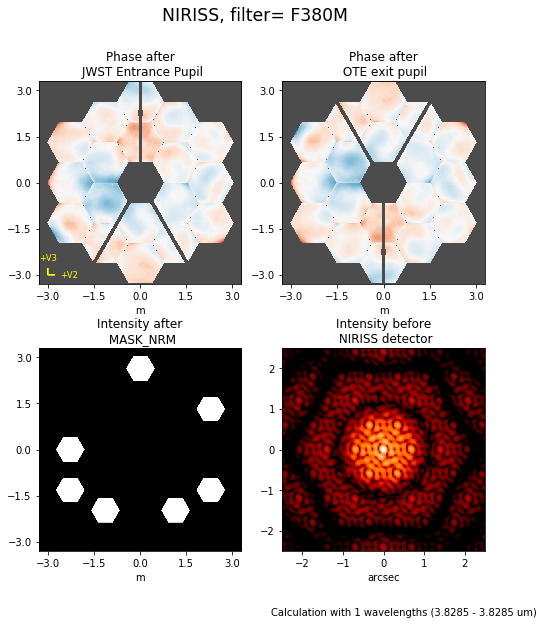

In [15]:
import webbpsf
import numpy as np
import os
%pylab inline
# Monochromatic PSF of aperture mask
ni=webbpsf.NIRISS()
ni.filter='F380M' #'F430M'
ni.pupil_mask='MASK_NRM'
plt.figure(figsize=(8,9))
monochromatic=ni.calc_psf(nlambda=1,display=True)


In [16]:
#Source spectra
#import pysynphot as S
#import matplotlib.pyplot as plt
#vega_file=os.path.join(
#    os.environ['PYSYN_CDBS'], 'calspec', 'alpha_lyr_stis_005.fits')
#vega=S.FileSpectrum(vega_file)
#plt.plot(vega.wave, vega.flux)
#plt.xlim(0, 12000)
#plt.xlabel(vega.waveunits)
#plt.ylabel(vega.fluxunits)
#plt.title(os.path.basename(vega.name))

Text(0.5,1,u'phoenix(Teff=6000,z=0,logG=4.5)')

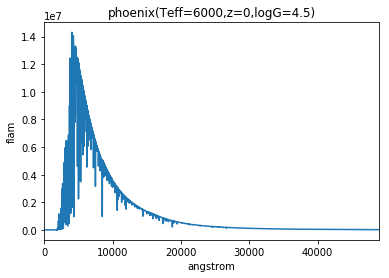

In [17]:
import pysynphot as S
import matplotlib.pyplot as plt
src = webbpsf.specFromSpectralType('G0V', catalog='phoenix')
plt.plot(src.wave, src.flux)
plt.xlim(0, 49000)
plt.xlabel(src.waveunits)
plt.ylabel(src.fluxunits)
plt.title(os.path.basename(src.name))

#psf=ni.calc_psf(source=src,display=True)

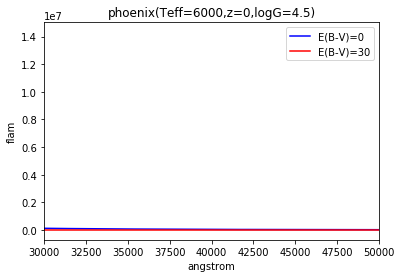

In [4]:
#Extinction
src_ext=src*S.Extinction(30,'mwdense')

plt.plot(src.wave, src.flux, 'b', label='E(B-V)=0')
plt.plot(src_ext.wave, src_ext.flux, 'r', label='E(B-V)=30')
plt.xlim(30000, 50000)
#plt.ylim(0,1e-7)
plt.xlabel(src.waveunits)
plt.ylabel(src.fluxunits)
plt.title(src.name)
plt.legend(loc='best')

/suphys/klam8364/.conda/envs/astroconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


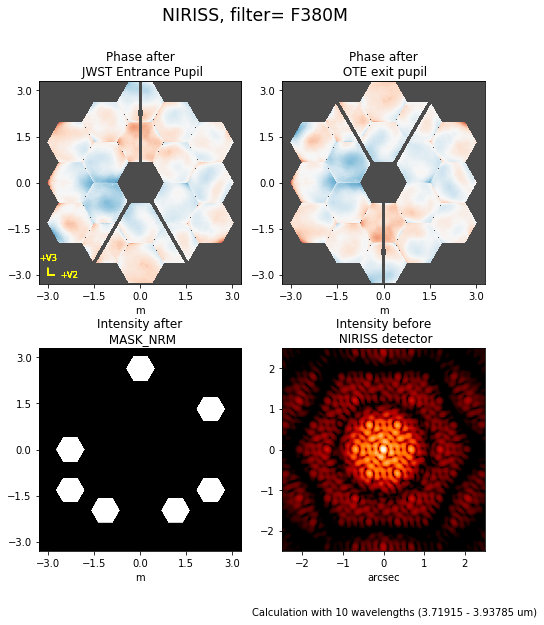

In [5]:
#Broadband PSF
plt.figure(figsize=(8,9))
star=ni.calc_psf(source=src_ext,display=True)

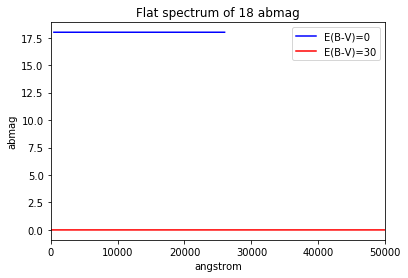

In [6]:
#Black hole source: flat spectra
flatsp = S.FlatSpectrum(18, fluxunits='abmag')
flatsp_ext=src*S.Extinction(30,'mwdense')

plt.plot(flatsp.wave, flatsp.flux, 'b', label='E(B-V)=0')
plt.plot(flatsp_ext.wave, flatsp_ext.flux, 'r', label='E(B-V)=30')
plt.xlim(0, 50000)
plt.xlabel(flatsp.waveunits)
plt.ylabel(flatsp.fluxunits)
plt.title(flatsp.name)
plt.legend(loc='best')

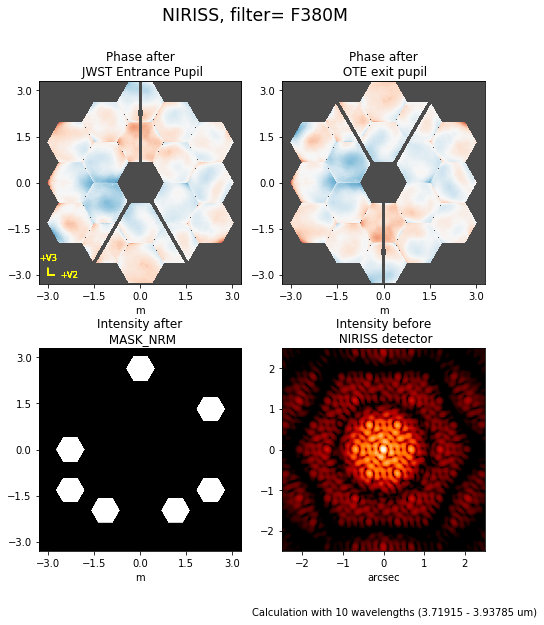

In [7]:
#Flat PSF
plt.figure(figsize=(8,9))
bh=ni.calc_psf(source=flatsp_ext,display=True)

In [5]:
#ni.options['source_offset_r'] = 0.3 # offset in arcseconds
#ni.options['source_offset_theta'] = 45. # degrees counterclockwise from instrumental +Y␣→in the science frame
ni.options['jitter']='gaussian'
ni.options['jitter_sigma']=0.009    #in arcsec, default 0.007

In [6]:
#Renormalization
bp = S.Box(50000, 50000)
flatsp_ext_n=flatsp_ext.renorm(10,'ABMag',bp)
plt.plot(flatsp_ext.wave, flatsp_ext.flux, 'b', label='Original')
plt.plot(flatsp_ext_n.wave, flatsp_ext_n.flux, 'r', label='Renormalized')
plt.xlabel(flatsp_ext.waveunits)
plt.ylabel(flatsp_ext.fluxunits)
plt.title(flatsp_ext.name)
plt.legend(loc='best')

NameError: name 'flatsp_ext' is not defined

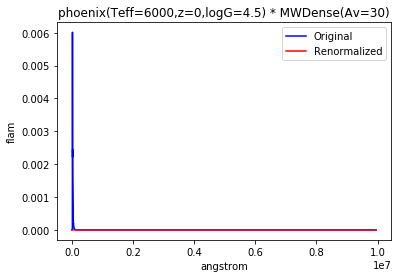

In [7]:
src_ext_n=src_ext.renorm(10,'ABMag',bp)
plt.plot(src_ext.wave, src_ext.flux, 'b', label='Original')
plt.plot(src_ext_n.wave, src_ext_n.flux, 'r', label='Renormalized')
plt.xlabel(src_ext.waveunits)
plt.ylabel(src_ext.fluxunits)
plt.title(src_ext.name)
plt.legend(loc='best')

/suphys/klam8364/.conda/envs/astroconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


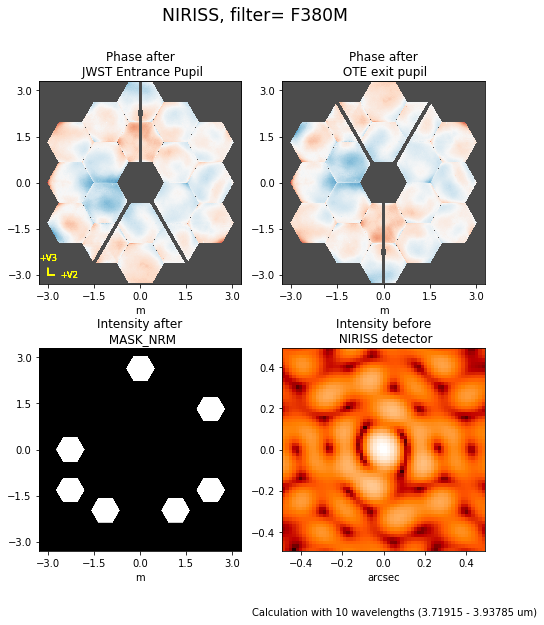

In [8]:
plt.figure(figsize=(8,9))
result=ni.calc_psf(source=src_ext_n, fov_arcsec=1, oversample=4,display=True)

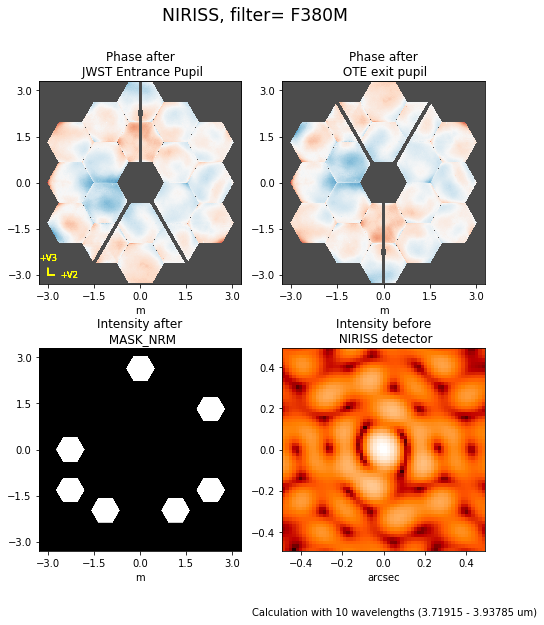

In [9]:
plt.figure(figsize=(8,9))
resultn=ni.calc_psf(source=src_ext_n, fov_arcsec=1, oversample=4,display=True, normalize='exit_pupil')

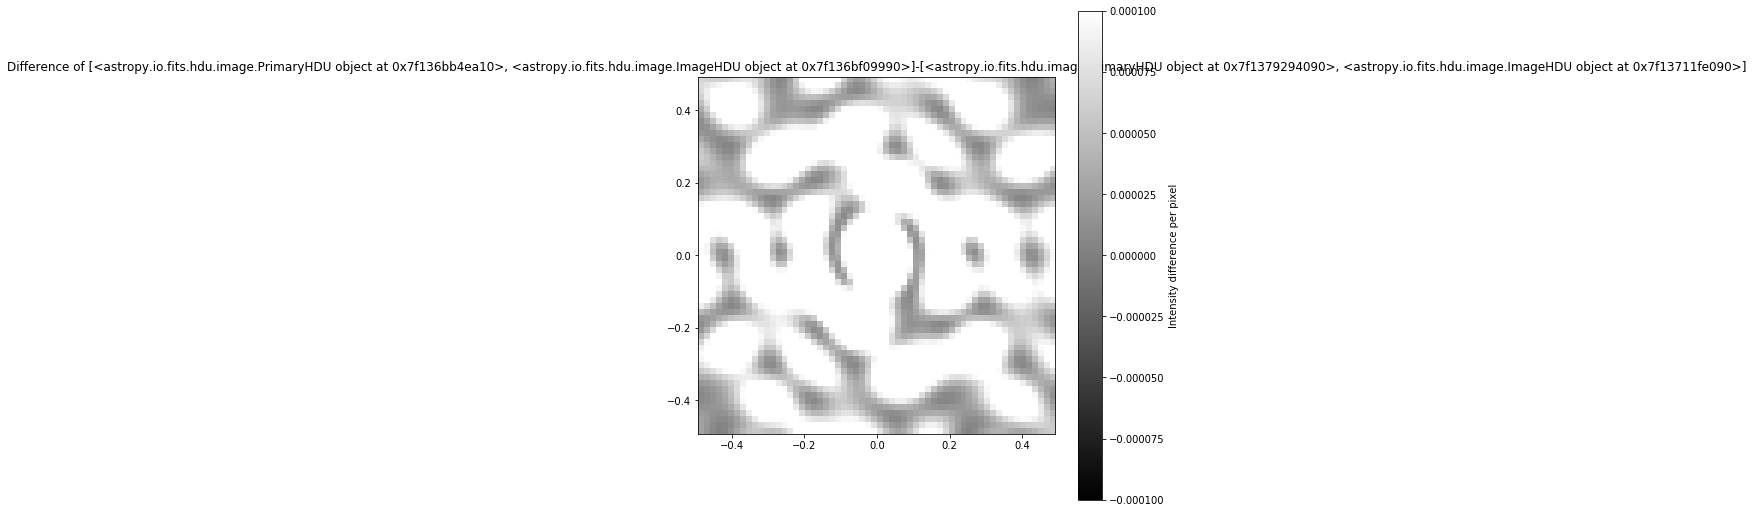

In [10]:
plt.figure(figsize=(8,9))
webbpsf.display_psf_difference(resultn,result)

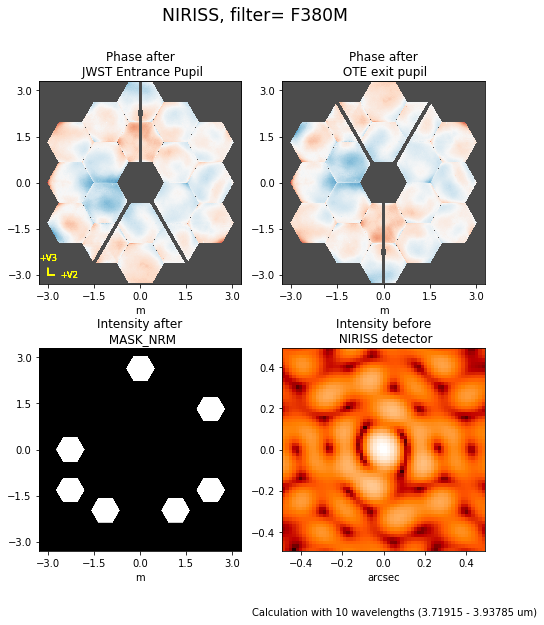

In [12]:
plt.figure(figsize=(8,9))
bh=ni.calc_psf(source=flatsp_ext_n, fov_arcsec=1, oversample=4,display=True)

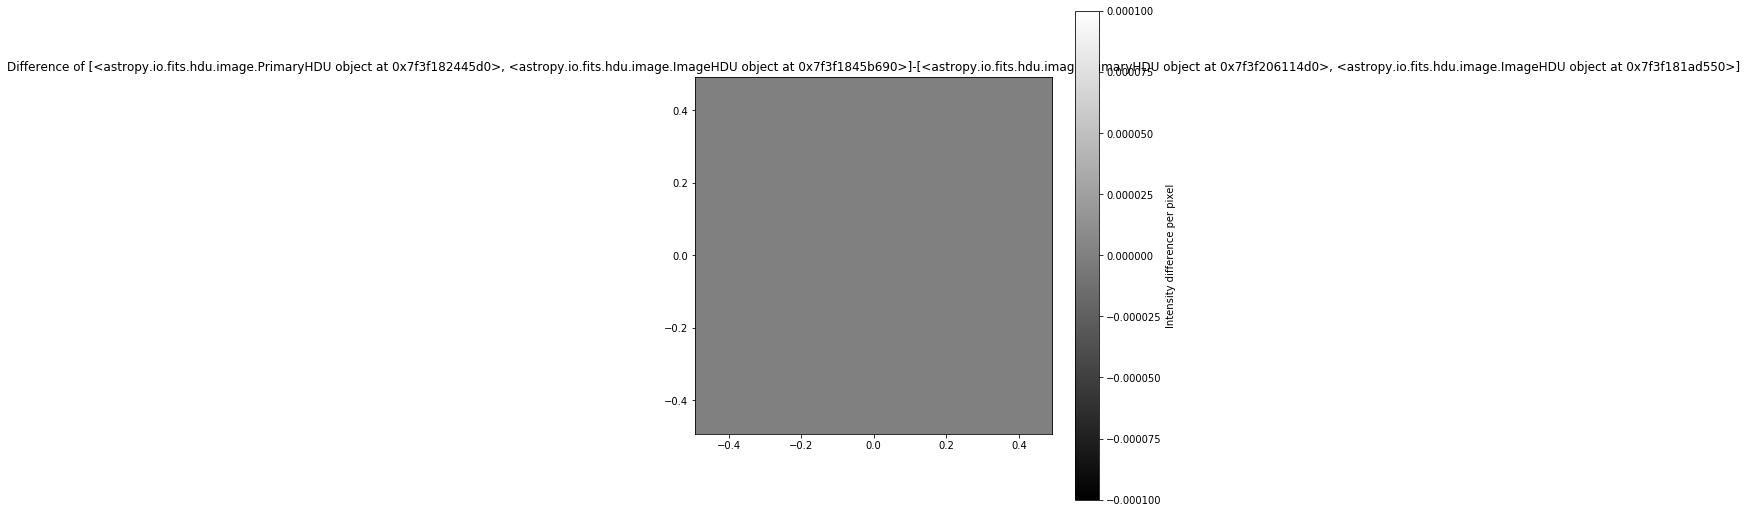

In [46]:
plt.figure(figsize=(8,9))
webbpsf.display_psf_difference(bh,result)

In [11]:
result.writeto('Resultpsf')

IOError: File 'Resultpsf' already exists.

In [31]:
import pyfits
from astropy.io import fits
#pyfits.PrimaryHDU(data=result['DET_SAMP'].data, header=result['DET_SAMP'].header).writeto('ResultsHDUpsf')
hdul=pyfits.open('Resultpsf')

In [32]:
hdul.info()
#hdul.close()

Filename: Resultpsf
No.    Name         Type      Cards   Dimensions   Format
0    OVERSAMP    PrimaryHDU      68   (60, 60)     float64   
1    DET_SAMP    ImageHDU        70   (15, 15)     float64   


In [43]:
data=hdul[0].data
data.shape

(60, 60)